<h3>Prerequisite for Collab</h3>

In [ ]:
!pip install pyomo

In [ ]:
!pip install highspy

In [ ]:
!pip install pyscipopt

In [ ]:
!pip install shapely

<h3>Prerequisite for Conda Installation</h3>

In [ ]:
#On Mac Terminal: conda create -n optim_env python=3.10
#conda activate optim_env
#conda install -c conda-forge pyomo scip
#conda install -c conda-forge glpk     # Linear / MILP solver
#conda install -c conda-forge highs    # Linear / Quadratic solver
#conda install -c conda-forge ipopt    # Nonlinear solver
#conda install -c conda-forge scip     # MINLP solver
#conda install networkx
#conda install conda-forge::matplotlib

# **I. Network Analysis**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import time

# Step 1: Create graph
G2 = nx.Graph()

# Step 2: Define node data with BOTH position and label
# Each entry: node_id: {"pos": (x, y), "label": "..."}
node_data = {
    1:  {"pos": (-4.559058, 15.174809), "label": "Route de Matadi (border Kinshasa)"},
    2:  {"pos": (-4.442848, 15.255100), "label": "Triangle Matadi Kibala"},
    3:  {"pos": (-4.406924, 15.256513), "label": "UPN"},
    4:  {"pos": (-4.349325, 15.238810), "label": "Av. de l'École – Binza"},
    5:  {"pos": (-4.328773, 15.252333), "label": "Mont Ngaliema"},
    6:  {"pos": (-4.310907, 15.288488), "label": "Bd du 30 Juin"},
    7:  {"pos": (-4.299709, 15.319240), "label": "Gare Centrale"},
    8:  {"pos": (-4.398246, 15.276497), "label": "Selembao (Auto Stop)"},
    9:  {"pos": (-4.381511, 15.282728), "label": "Sanatorium"},
    10: {"pos": (-4.337062, 15.295951), "label": "Pierre Mulele"},
    11: {"pos": (-4.395099, 15.307741), "label": "Triangle Campus"},
    12: {"pos": (-4.389760, 15.314763), "label": "Rond Point Ngaba"},
    13: {"pos": (-4.336819, 15.326397), "label": "Av. de l'Université"},
    14: {"pos": (-4.331834, 15.314427), "label": "Bd Triomphal"},
    15: {"pos": (-4.393572, 15.333011), "label": "Lemba"},
    16: {"pos": (-4.375441, 15.344869), "label": "Échangeur 1"},
    17: {"pos": (-4.397829, 15.393514), "label": "Masina"},
    18: {"pos": (-4.405498, 15.423430), "label": "Av. Ndjoku"},
    19: {"pos": (-4.391380, 15.446782), "label": "Aéroport Ndjili"},
    20: {"pos": (-4.384103, 15.470908), "label": "Nsele"},
    21: {"pos": (-4.209434, 15.578420), "label": "RP Nsele"},
    22: {"pos": (-4.202280, 15.613246), "label": "Menkao"},
    23: {"pos": (-4.051282, 15.558907), "label": "Maluku"},
    # 23 intentionally omitted
    24: {"pos": (-4.472585, 15.281341), "label": "Arrêt Gare"},
    25: {"pos": (-4.420154, 15.307442), "label": "UNIKIN"},
    26: {"pos": (-4.461385, 15.288240), "label": "Kimwenza 2"},
    27: {"pos": (-4.484759, 15.219752), "label": "Benseke"},
    28: {"pos": (-4.447334, 15.249644), "label": "Wenze Matadi Kibala"},
    29: {"pos": (-4.329183, 15.337959), "label": "Limete PL"},
    30: {"pos": (-4.353936, 15.335540), "label": "Limete R"},
    
}

# Step 3: Add nodes with attributes
for node, attrs in node_data.items():
    G2.add_node(node, **attrs)  # adds both 'pos' and 'label'

# Step 4: Define edges with names
edges = [
    (1, 27, {"name": "Route de Matadi - Benseke"}),
    (27, 28, {"name": "Benseke - Wenze Matadi Kibala"}),
    (28, 2, {"name": "Wenze (Matadi Kibala) - Triangle (Cité Verte)"}),
    (2, 3, {"name": "Matadi Kibala - UPN"}),
    (3, 4, {"name": "UPN - Binza"}),
    (4, 5, {"name": "Binza - Mont Ngaliema"}),
    (5, 6, {"name": "Boulevard du 30 Juin"}),
    (6, 7, {"name": "24 - Gare Centrale"}),
    (3, 8, {"name": "UPN - Selembao"}),
    (8, 9, {"name": "Sanatorium - Université"}),
    (9, 10, {"name": "Sanatorium - Pierre Mulele"}),
    (10, 6, {"name": "24 Novembre"}),
    (2, 11, {"name": "Triangle (Cité Verte) - Triangle (Campus)"}),
    (11, 12, {"name": "Tr.Campus - RP Ngaba"}),
    (12, 13, {"name": "Av. Université"}),
    (10, 14, {"name": "B. Triomphal"}),
    (13, 14, {"name": "B. Sendwe"}),
    (12, 15, {"name": "RP Ngaba - Lemba"}),
    (15, 16, {"name": "Lemba - Echangeur 1"}),
    (13, 30, {"name": "Sendwe - Limete"}),
    (30, 16, {"name": "Limete. Lumumba 1"}),
    (16, 17, {"name": "Echangeur - Masina"}),
    (17, 18, {"name": "Masina - Av.Ndjoku (B.Lumumba 2)"}),
    (18, 19, {"name": "Av.Ndjoku - Int Aeroport (B.Lumumba 3)"}),#
    (19, 20, {"name": "Aeroport - Nsele"}),#
    (20, 21, {"name": "Nsele - RP. Nsele"}),#
    (21, 22, {"name": "RP.Nsele - Menkao"}),#
    (21, 23, {"name": "RP.Nsele - Maluku"}),#
    (2, 24, {"name": "Triangle Cité Verte - R. Kimwenza"}),#
    (11, 25, {"name": "Triangle Campus - Unikin"}),#
    (12, 25, {"name": "RP Ngaba - Unikin"}),#
    (25, 26, {"name": "Unikin - Kimwenza 2"}),#
    (7, 29, {"name": "Gare Centrale - Poids Lourd"}),#
    (29, 16, {"name": "Poids Lourd - Echangeur"}),#
]
G2.add_edges_from(edges)
G0 = G2.copy()

In [ ]:
#(Distance) Calibration -------------------------------------
P1 = node_data[3]['pos']
P2 = node_data[27]['pos']
d = math.sqrt((P1[0]-P2[0])**2 + (P1[1]-P2[1])**2 )
True_d  = 4.2
calibration_score = d/True_d
print(d,calibration_score)
# ----------------------------------------------------------
# Edge lengths (Euclidean from node positions)
# ----------------------------------------------------------
def compute_edge_lengths(G):
    #pos = nx.get_node_attributes(G, 'pos')
    lengths = {}
    for (u, v) in G.edges(): 
        x1, y1 = node_data[u]['pos']
        x2, y2 = node_data[v]['pos']
        lengths[(u, v)] = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return lengths

<h3>Problem Configuration</h3>

In [ ]:
from joblib import load

demand_dict = load("../../data/od_demand.joblib")
print("Loaded", len(demand_dict), "OD pairs.")


In [ ]:
#----- Complete Graph
Gc = nx.complete_graph(G0.nodes()) #complete graph
Gs = Gc.copy()
Gs.remove_edges_from(G0.edges())
complete_edge_list = Gs.edges()
#---- System Configuration ----------------------
lengths = compute_edge_lengths(Gc)
cost_weights = {(i,j): lengths[i,j] for (i,j) in Gc.edges()}
CALIB = calibration_score
#-------- Demand Data ---------------------------
OD_pairs = demand_dict.keys() #[(1,27),(16,18),(5,7),(10,13)] #Origin Destination Pairs
demand_paths = demand_dict# {(1,27):25, (16,18):15, (5,7):15, (10,13):18}
Budget = 100 #100 Km
v_avg = 40
travel_t0 = {(i,j):(cost_weights[i,j]/calibration_score)/v_avg for (i,j) in Gc.edges()}
travel_alpha = {(i,j):0.15 for (i,j) in Gc.edges()}
#Optimisation settings
penalty_factor = 1e9
optim_max_iter = 1
optim_stall_iter = optim_max_iter
optim_pop_size = 5
#pso settings
pso_wmax =1.2
pso_wmin =0.4
pso_c1 =2.0
pso_c2 =2.0
pso_vmax = 4
#Number of runs
n_runs = 1

<h3>Analysis</h3>

In [ ]:
import math
import networkx as nx
import matplotlib.pyplot as plt

def draw_rotated_graph(
    G,
    degrees=-90,
    figsize=(10, 8),
    invert_x=True,
    edge_flows=None,
    scale=1/200,
    show_labels=True,
    node_size=120,
    spread=2.0,
    label_pos=0.55,
    node_font_size=6,
    edge_font_size=6
):

    def rotate_pos(pos_dict, degrees):
        theta = math.radians(degrees)
        cos_t, sin_t = math.cos(theta), math.sin(theta)
        return {
            n: (x * cos_t + y * sin_t, -x * sin_t + y * cos_t)
            for n, (x, y) in pos_dict.items()
        }

    # Get positions
    pos = nx.get_node_attributes(G, 'pos')
    if not pos:
        pos = nx.spring_layout(G, seed=42, k=1.0)

    pos_rotated = rotate_pos(pos, degrees)
    pos_scaled = {n: (x*spread, y*spread) for n, (x,y) in pos_rotated.items()}

    # Edge widths
    edge_widths = []
    for (u,v) in G.edges():
        flow = 0.0
        if edge_flows:
            flow = edge_flows.get((u, v), edge_flows.get((v, u), 0.0))
        edge_widths.append(max(0.5, flow * scale))

    # Edge color normalization
    edge_values = []
    if edge_flows:
        flow_vals = [
            edge_flows.get((u,v), edge_flows.get((v,u), 0.0))
            for (u,v) in G.edges()
        ]
        f_min, f_max = min(flow_vals), max(flow_vals)

        for (u,v) in G.edges():
            f = edge_flows.get((u,v), edge_flows.get((v,u), 0.0))
            norm_f = (f - f_min) / (f_max - f_min) if f_max > f_min else 0.0
            edge_values.append(norm_f)
    else:
        edge_values = "grey"

    # Plot
    plt.figure(figsize=figsize)
    nx.draw_networkx_nodes(G, pos_scaled, node_size=node_size, node_color="lightblue")
    nx.draw_networkx_labels(G, pos_scaled, font_size=node_font_size, font_weight="bold")

    nx.draw_networkx_edges(
        G,
        pos_scaled,
        width=edge_widths,
        edge_color=edge_values,
        edge_cmap=plt.cm.RdYlGn_r,  # green=low, red=high
        arrows=G.is_directed()
    )

    if edge_flows and show_labels:
        edge_labels = {
            (u,v): f"{edge_flows.get((u,v), edge_flows.get((v,u), 0.0)):.2f}"
            for (u,v) in G.edges()
        }
        nx.draw_networkx_edge_labels(
            G,
            pos_scaled,
            edge_labels=edge_labels,
            font_size=edge_font_size,
            label_pos=label_pos,
            font_color="brown"
        )

    if invert_x:
        plt.gca().invert_xaxis()

    plt.axis("off")
    plt.show()


In [ ]:
draw_rotated_graph(G2)

In [ ]:
#Optimisation Preparation
import networkx as nx
Gs = Gc.copy()
Gs.remove_edges_from(G0.edges())
print('[0] Initial Network:',G0, '\n[1] Complete Network:', Gc,'\n[2] Solution Network:',Gs)
#candidate solution
Gi = G0
def get_simple_paths(Gi, r, s):
  return list(nx.all_simple_paths(Gi,source=r,target=s))

In [ ]:
from shapely.geometry import LineString
from shapely.strtree import STRtree
import itertools

def precompute_intersections(node_data):
    """
    Compute all intersecting edge pairs in a complete geometric graph.

    Parameters
    ----------
    node_data : dict
        {node_id: {"pos": (x, y)}}

    Returns
    -------
    list[tuple]
        [((u1, v1), (u2, v2)), ...] where each pair of edges intersects.
    """

    # === 1. Build edge list and geometries ===
    nodes = list(node_data.keys())
    edges = [(u, v) for u, v in itertools.combinations(nodes, 2)]
    geoms = [LineString([node_data[u]["pos"], node_data[v]["pos"]]) for u, v in edges]

    # === 2. Build spatial index ===
    tree = STRtree(geoms)

    # === 3. Map geometry id back to its index ===
    # These are actual geometry objects used in the tree.
    geom_to_index = {g: i for i, g in enumerate(geoms)}

    # === 4. Compute intersections ===
    intersection_pairs = set()

    for i, geom1 in enumerate(geoms):
        edge1 = edges[i]
        for geom2 in tree.query(geom1):
            # Some STRtree versions return proxy types; skip if not valid geometry
            if not isinstance(geom2, LineString):
                continue

            j = geom_to_index.get(geom2)
            if j is None or j == i:
                continue
            edge2 = edges[j]

            # Skip shared endpoints
            if set(edge1) & set(edge2):
                continue

            # Use .crosses() which ensures proper line intersection (not touching)
            if geom1.crosses(geom2):
                intersection_pairs.add(tuple(sorted([edge1, edge2])))

    return list(intersection_pairs)


In [ ]:
precomputed_pairs = precompute_intersections(node_data)
precomputed_pairs

In [ ]:
def count_intersections_subnetwork(G, precomputed_pairs):
    """
    Count how many of the precomputed intersection pairs exist in G.
    """
    edges_in_G = set(tuple(sorted(e)) for e in G.edges())
    count = sum(1 for (e1, e2) in precomputed_pairs
                if e1 in edges_in_G and e2 in edges_in_G)
    return count


In [ ]:
Gi_ = G0.copy()
Gi_.add_edges_from([(1,25),(1,6)])
draw_rotated_graph(Gi_)

# **I. Greedy Algorithm**

A transportation network design problem (TNDP) is formulated as bilevel optimisation problem.

\begin{align}
  \textbf{ULP}: \underset{y}{Minimise} \text{ }\quad  & \underset{}{T(y) = \sum_{(i,j)\in \Gamma \cup E}x^*_{i,j}t_{ij}(x^*_{i,j})}\\
   s.t\quad  & \sum_{}^{}c_{i,j}y_{i,j } \leq  B\\
   \quad & y_{i,j}\in\{0,1\}\\
   \quad & x^*_{i,j} = \text{arg min }F(x,f,y)\\
   \textbf{LLP}: \underset{x, f}{Minimise} \text{ }\quad & \underset{}{F(x,f,y) = \sum_{(i,j)\in \Gamma\cup E} \int_{0}^{x_{i,j}}t_{i,j}(w)dw}\\
   s.t\quad & x_{i,j}=\sum_{P_{r,s}\in E\cup \Gamma}\sum_{k\in P_{r,s}}f_k\delta_k^{i,j}\\
   \quad & \sum_{k\in P_{r,s}}f_k=d_{r,s}\\
   \quad & f_k\geq 0\\
   \quad & x_{i,j}\geq 0\\
   \quad & \delta_k^{i,j}\in \{0,1\}
\end{align}
where $y_{i,j}$ is a decision variable to add or remove an edge $(i,j)$, $x_{i,j}$ is the overall flow rate of the edge $(i,j)$, $f_k$ is the flow of a path $k$ in a given origin destination pair $(r,s)$ and $\delta_k^{i,j}$ a network structure variable that excludes a flow $f_k$ if it does not go through $x_{i,j}$.

The travel time function is typically given \cite{babazadeh2011application,koh2007solving,zhang2009bilevel} as
\begin{equation}
t(x) = t_{ij}(x_{ij}) = \alpha_{ij}+\beta_{ij}x_{ij}^4   
\end{equation}


<h3>Greedy Algorithm</h3>
In the problem of network augmentation, a greedy algorithm proposed can be used to iteratively identify a good candidate subset that will minimise $T(y)$ using a step-by-step greedy addition of local best links \cite{medya2018group}. The advantage of greedy algorithms is in providing stable, efficient and ``good'' solutions (see algorithm \ref{alg:greedy}).

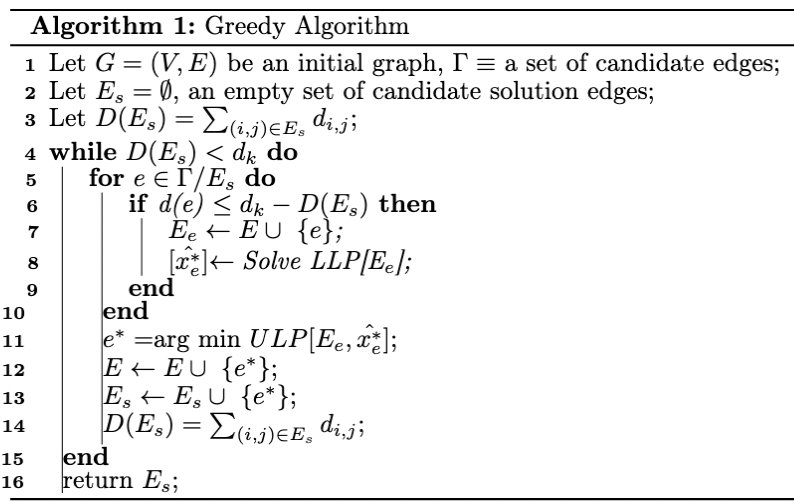

At each iteration, a sample candidate edge is selected from $\Gamma/E_s$ and added to a novel network $G_e$ with more edge additions. The edge that yields the best cost function minimisation is added to the candidate solution pool $E_s$, and as such, the network is updated, the candidate subset and termination constraint are updated. This process continues until a termination criterion is reached.

<h3>Lower Level Problem Solver</h3>

In [ ]:
import pyomo.environ as pyo
import numpy as np
import math
import ast
import networkx as nx

#Var2Edge
def var2edge(edge_list,y_var):
    return [edge for edge,y_i in zip(edge_list,y_var) if y_i==1]

#Edge2Var
def edge2var(edge_list,edges_):
    ys = [1 if (i,j) in edges_ or (j,i) in edges_ else 0 for (i,j) in edge_list]
    return ys
    
#Travel time function
def travel_time_discrete(t0,alpha,x_ij,C=1000.0):
    return t0*(1 + alpha*(x_ij/C)**4)
    
def travel_time_integral(t0,alpha,x_ij,C=1000.0):
    return t0*(x_ij + 0.2*alpha*(x_ij**5)/(C**4))

#Lower Level Problem
def LLP_problem_solve(G_0, design_edges, 
                      OD_pairs, 
                      demand_paths, 
                      travel_t0, 
                      travel_alpha,
                      display=True,
                      solver_="ipopt"
                      ):

    Gi = G_0.copy() #New Design Network
    Gi.add_edges_from(design_edges) #Add edges to network

    """
    #get flow paths between root and destination
    def get_flow_paths(Gi,r,s):
      paths_ = list(nx.all_simple_paths(Gi,source=r,target=s))
      return [list(zip(path[:-1],path[1:])) for path in paths_]
    flow_paths = {(r,s): get_flow_paths(Gi,r,s)  for (r,s) in OD_pairs}
    """

    # Get flow paths between root and destination
    def get_flow_paths(Gi, r, s, k=5, weight=None):
        """
        Returns up to k shortest simple paths (instead of all simple paths).
        Much more efficient for large graphs.
        """
        gen = nx.shortest_simple_paths(Gi, source=r, target=s, weight=weight)
        paths_ = []
        for i, path in enumerate(gen):
            if i >= k:   # stop after k paths
                break
            paths_.append(list(zip(path[:-1], path[1:])))
        return paths_
    
    # Dictionary of OD flow paths
    flow_paths = {(r, s): get_flow_paths(Gi, r, s, k=5, weight="length") for (r, s) in OD_pairs}

    #Get flow dictionary: paths per (r,s)
    flow_dics = {} #flow dictionaries
    flow_vars_inds = []
    for fi in flow_paths:
      i = 0
      for path in flow_paths[fi]:
        flow_var = f'{fi}_%d'%(i+1)
        flow_dics[flow_var] =  path#store paths
        flow_vars_inds.append(flow_var)
        i+=1
    
    #flow demand rule
    def flow_demand_rule(problem,i,j):
      return sum(problem.f_k[str((i,j))+'_%d'%(ii+1)] for ii in range(len(flow_paths[i,j]))) == demand_paths[i,j]
    
    #flow - overall flow rule [link-path consistency]
    def flow_xij_rule(problem,i,j):
      expr = 0
      for key in flow_dics:
        path = flow_dics[key]
        if (i,j) in path or (j,i) in path:
          expr += problem.f_k[key]
      return expr==problem.x_ij[i,j]
    
    #Create Lower Level Problem
    LL_Trans_Problem = pyo.ConcreteModel()
    LL_Trans_Problem.x_ij = pyo.Var(Gi.edges(),within=pyo.NonNegativeReals) #continuous flow variables
    LL_Trans_Problem.f_k = pyo.Var(flow_vars_inds, within=pyo.NonNegativeReals) #Flow variables are rs-dependent
    LL_Trans_Problem.constraint_flow = pyo.Constraint(OD_pairs,rule=flow_demand_rule)#Flow Demand rule
    LL_Trans_Problem.constraint_flow_xij = pyo.Constraint(Gi.edges(),rule=flow_xij_rule)#Flow Xij rule
    #LL_Trans_Problem.obj = pyo.Objective(expr=sum(LL_Trans_Problem.x_ij[i,j]*travel_time_integral(travel_t0[i,j],travel_alpha[i,j],LL_Trans_Problem.x_ij[i,j]) for (i,j) in LL_Trans_Problem.x_ij))
    LL_Trans_Problem.obj = pyo.Objective(expr=sum(travel_time_integral(travel_t0[i,j],travel_alpha[i,j],LL_Trans_Problem.x_ij[i,j]) for (i,j) in LL_Trans_Problem.x_ij))

    pyo.SolverFactory(solver_).solve(LL_Trans_Problem,tee=display)

    if display:
        print('Number of x-variables: ',len(LL_Trans_Problem.x_ij),'\n')
    x_flows = {}
    for (i,j) in LL_Trans_Problem.x_ij:
        x_flows[i,j] = pyo.value(LL_Trans_Problem.x_ij[i,j])
        if display:
            print(f"x[{i},{j}] =",x_flows[i,j] )

    if display:
        print('Number of f-variables: ',len(LL_Trans_Problem.f_k),'\n')
    f_flows = {}
    for i in LL_Trans_Problem.f_k:
        f_flows[i] = pyo.value(LL_Trans_Problem.f_k[i])
        if display:
            print(f"f[{k}] =", pyo.value(LL_Trans_Problem.f_k[k]))

    L_opt = pyo.value(LL_Trans_Problem.obj)#optimal valur
    
    return L_opt, x_flows,f_flows

<h3>Lower Level Problem - Case Study</h3>

In [ ]:
E_e = [(26,4)] #Design edges
L_opt, x_flows, f_flows = LLP_problem_solve(G0, 
                                            design_edges=E_e, 
                                            OD_pairs=OD_pairs, 
                                            demand_paths=demand_paths,
                                            travel_t0=travel_t0,
                                            travel_alpha=travel_alpha,
                                            display=False
                                           )


In [ ]:
print("\n--- Results ---")
print("Objective =", L_opt)

In [ ]:
print('Number of x-variables: ',len(x_flows),'\n')
for (i,j) in x_flows:
    print(f"x[{i},{j}] =",x_flows[i,j] )

In [ ]:
print('Number of f-variables: ',len(f_flows),'\n')
for k in f_flows:
    print(f"f[{k}] =", f_flows[k])


In [ ]:
Gi = G0.copy()
Gi.add_edges_from(E_e)
draw_rotated_graph(Gi,edge_flows=x_flows)

<h3>Upper Level Problem</h3>

In [ ]:
#--------------------------------------------------
def Upper_Level_Problem_obj_func(G0, 
                                y_vars=None, 
                                OD_pairs=OD_pairs, 
                                demand_paths=demand_paths,
                                travel_t0=travel_t0,
                                travel_alpha=travel_alpha,
                                cost_weights = cost_weights,
                                budget = 100,
                                penalty_factor = 1e9,
                                calib = CALIB,
                                complete_edge_vars=complete_edge_list,
                                display=False):
    
    E_e = [edge for edge,y_i in zip(complete_edge_vars,y_vars) if y_i== 1]#new design variables
    #print('E',E_e)
    #-- Solve the LLP problem
    L_opt, x_flows, f_flows = LLP_problem_solve(G0, 
                                            design_edges=E_e, 
                                            OD_pairs=OD_pairs, 
                                            demand_paths=demand_paths,
                                            travel_t0=travel_t0,
                                            travel_alpha=travel_alpha,
                                            display=display
                                           )
    #Solve the Objective Function
    obj_value = sum([x_flows[i,j]*travel_time_discrete(travel_t0[i,j],travel_alpha[i,j],x_flows[i,j]) for (i,j) in x_flows])
    penalty = max(0,sum([cost_weights[i,j] for (i,j) in E_e])-budget*calib)
    #print('penalty:', penalty)
    pure_cost = obj_value
    obj_value += penalty_factor*penalty
    
    return obj_value, x_flows, pure_cost



#------------------------------------------------ (Test Example) ----
y_vars = edge2var(complete_edge_list,[])
#---------------------------------------------------------------------
obj_value,x_flows,pure_cost = Upper_Level_Problem_obj_func(G0, 
                                y_vars=y_vars, 
                                OD_pairs=OD_pairs, 
                                demand_paths=demand_paths,
                                travel_t0=travel_t0,
                                travel_alpha=travel_alpha,
                                budget = Budget,
                                cost_weights = cost_weights,
                                complete_edge_vars=complete_edge_list,
                                display=False)
                                         
print('\n\nUpper problem value:', obj_value)    

In [ ]:
E_e = [edge for edge,y_i in zip(complete_edge_list,y_vars) if y_i== 1]
Gi = G0.copy()
Gi.add_edges_from(E_e)
draw_rotated_graph(Gi,edge_flows=x_flows)

In [ ]:
def evaluate_upper_level(selected_edges, display=False):
    """
    Evaluate the Upper-Level Problem (ULP) given a list of selected edges only.
    
    Parameters
    ----------
    selected_edges : list of tuples
        Edges to add to the base network, e.g. [(26,4), (26,23)].
    display : bool, optional
        If True, prints progress and diagnostic details.

    Returns
    -------
    obj_value : float
        Objective value of the upper-level problem.
    x_flows : dict
        Flow solution from the lower-level problem.
    """

    # === Access or import the encapsulated parameters ===
    global G0, complete_edge_list, OD_pairs, demand_paths
    global travel_t0, travel_alpha, cost_weights, Budget, CALIB

    # --- Convert edge list to binary decision vector ---
    y_vars = [1 if e in selected_edges else 0 for e in complete_edge_list]

    # --- Evaluate the upper-level objective ---
    obj_value, x_flows, pure_cost = Upper_Level_Problem_obj_func(
        G0,
        y_vars=y_vars,
        OD_pairs=OD_pairs,
        demand_paths=demand_paths,
        travel_t0=travel_t0,
        travel_alpha=travel_alpha,
        cost_weights=cost_weights,
        budget=Budget,
        penalty_factor=1e9,
        calib=CALIB,
        complete_edge_vars=complete_edge_list,
        display=display
    )

    if display:
        print("Selected edges:", selected_edges)
        print(f"Upper-level objective value = {obj_value:.4f}")

    distance = 0
    for e in selected_edges:
        distance+= cost_weights[e]
        
    return obj_value, x_flows, pure_cost, distance/CALIB


In [ ]:
def visualize_network(selected_edges, edge_flows=None, display=True):
    """
    Visualize the network for a given set of selected edges and optional flow data.

    Parameters
    ----------
    selected_edges : list of tuples
        Edges to be added to the base graph, e.g. [(26,4), (26,23)].
    edge_flows : dict, optional
        Dictionary of edge flow values (can be None).
    display : bool, optional
        If True, prints the number of edges and draws the graph.

    Returns
    -------
    Gi : networkx.Graph
        The updated network with selected edges added.
    """

    # Use global base graph (for simplicity)
    global G0

    Gi = G0.copy()
    Gi.add_edges_from(selected_edges)

    if display:
        print(f"Visualising network with {len(selected_edges)} added edges...")
        try:
            draw_rotated_graph(Gi, edge_flows=edge_flows)
        except Exception as e:
            print(f"⚠️ Could not draw graph: {e}")
    return Gi


<h2>Particle Swarm Optimisaition</h2>

In [ ]:
import numpy as np
import random
import time

def pso_upper_solver(
    G0,
    complete_edge_list,
    OD_pairs,
    demand_paths,
    travel_t0,
    travel_alpha,
    cost_weights,
    budget=100,
    calib=1.0,
    penalty_factor=1e9,
    # PSO parameters
    num_particles=optim_pop_size,
    max_iter=optim_max_iter,
    w_max=pso_wmax,
    w_min=pso_wmin,
    c1=pso_c1,
    c2=pso_c2,
    vmax=pso_vmax,
    seed=None,
    display=False
):
    """
    Binary Particle Swarm Optimisation (PSO) solver for the Upper Level Problem (ULP).

    Each particle encodes a binary vector y over all candidate edges.
    Feasibility is enforced by pruning edges when total cost > budget * calib.
    """

    if seed is not None:
        random.seed(seed)
        np.random.seed(seed)

    n_edges = len(complete_edge_list)
    Bcap = budget * calib

    def cost_of(y):
        return sum(cost_weights[e] for i, e in enumerate(complete_edge_list) if y[i] == 1)

    def enforce_budget(y):
        """Ensure total cost ≤ budget by dropping random edges if needed."""
        total_cost = cost_of(y)
        if total_cost <= Bcap:
            return y
        active = [i for i, val in enumerate(y) if val == 1]
        random.shuffle(active)
        while total_cost > Bcap and active:
            idx = active.pop()
            y[idx] = 0
            total_cost = cost_of(y)
        return y

    def eval_obj(y):
        y_fixed = enforce_budget(y.copy())
        obj_val, flows, pure_cost = Upper_Level_Problem_obj_func(
            G0,
            y_vars=y_fixed,
            OD_pairs=OD_pairs,
            demand_paths=demand_paths,
            travel_t0=travel_t0,
            travel_alpha=travel_alpha,
            cost_weights=cost_weights,
            budget=budget,
            penalty_factor=penalty_factor,
            calib=calib,
            complete_edge_vars=complete_edge_list,
            display=False
        )
        return obj_val, flows, y_fixed

    # === Initialisation ===
    X = np.random.randint(0, 2, size=(num_particles, n_edges))  # binary positions
    V = np.random.uniform(-vmax, vmax, size=(num_particles, n_edges))  # velocities

    personal_best = X.copy()
    personal_best_obj = np.full(num_particles, np.inf)
    global_best = None
    global_best_obj = np.inf
    global_best_flows = None

    iter_history = {
        "edges": [],
        "obj": [],
        "flows": []
    }

    # === Main PSO loop ===
    for it in range(max_iter):
        w = w_max - ((w_max - w_min) * it / max_iter)  # linear inertia decay

        for p in range(num_particles):
            y = X[p].copy()
            obj_val, flows, y_fixed = eval_obj(y)
            if obj_val < personal_best_obj[p]:
                personal_best_obj[p] = obj_val
                personal_best[p] = y_fixed.copy()
            if obj_val < global_best_obj:
                global_best_obj = obj_val
                global_best = y_fixed.copy()
                global_best_flows = flows

        # === Update velocities and positions ===
        for p in range(num_particles):
            r1, r2 = np.random.rand(n_edges), np.random.rand(n_edges)
            V[p] = (
                w * V[p]
                + c1 * r1 * (personal_best[p] - X[p])
                + c2 * r2 * (global_best - X[p])
            )
            V[p] = np.clip(V[p], -vmax, vmax)

            # Apply sigmoid to convert velocities to probabilities
            sigmoid = 1.0 / (1.0 + np.exp(-V[p]))
            X[p] = (np.random.rand(n_edges) < sigmoid).astype(int)
            X[p] = enforce_budget(X[p])

        _y_vars = [int(round(v)) for v in global_best]
        _edges = [e for e, y in zip(complete_edge_list, _y_vars) if y == 1]
        iter_history["edges"].append(_edges.copy())
        iter_history["flows"].append(global_best_flows.copy())
        iter_history["obj"].append(global_best_obj)
        
        if display: #and (it % max(1, max_iter // 10) == 0 or it == max_iter - 1):
            print(f"[PSO] Iter={it+1}/{max_iter} BestObj={global_best_obj:.4f}")
            best_y_vars = [int(round(v)) for v in global_best]
            best_edges = [e for e, y in zip(complete_edge_list, best_y_vars) if y == 1]
            Gi = G0.copy()
            Gi.add_edges_from(best_edges)
            
            try:
                draw_rotated_graph(Gi, edge_flows=global_best_flows)
            except Exception:
                pass
                
    _y_vars = [int(round(v)) for v in global_best]
    _edges = [e for e, y in zip(complete_edge_list, _y_vars) if y == 1]
    return _edges.copy(), global_best_obj, global_best_flows,iter_history


In [ ]:
pso_best_edges_list   = []
pso_best_obj_list     = []
pso_best_flows_list   = []
pso_iter_history_list = []
elapsed_pso_list      = []

start_pso = time.time()

pso_best_edges, pso_best_obj, pso_best_flows,pso_iter_history = pso_upper_solver(
    G0,
    complete_edge_list,
    OD_pairs=OD_pairs,
    demand_paths=demand_paths,
    travel_t0=travel_t0,
    travel_alpha=travel_alpha,
    cost_weights=cost_weights,
    budget=Budget,
    calib=CALIB,
    num_particles=optim_pop_size,
    max_iter=optim_max_iter,
    w_max=pso_wmax,
    w_min=pso_wmin,
    c1=pso_c1,
    c2=pso_c2,
    vmax=pso_vmax,
    seed=42,
    display=True
)

stop_pso = time.time()
elapsed_pso = (stop_pso - start_pso)/60

print("\nPSO Chosen edges:", pso_best_edges)
print("Final objective:", pso_best_obj)
print(f"Elapsed time: {elapsed_pso:.4f} minutes")

# --- Store results from this run ---
elapsed_pso_list.append(elapsed_pso)
pso_best_edges_list.append(pso_best_edges.copy())
pso_best_obj_list.append(pso_best_obj)
pso_best_flows_list.append(pso_best_flows.copy())
pso_iter_history_list.append(pso_iter_history.copy())

<h2>Solution Comparison</h2>

In [ ]:
# ===============================================================
# === MULTIPLE RUNS: PARTICLE SWARM OPTIMISATION (PSO) ==========
# ===============================================================


for i in range(n_runs):
    print(f'PSO run number {i+1}...')
    # ------------------------------------------------------------
    start_pso = time.time()
    
    pso_best_edges, pso_best_obj, pso_best_flows, pso_iter_history = pso_upper_solver(
        G0,
        complete_edge_list,
        OD_pairs=OD_pairs,
        demand_paths=demand_paths,
        travel_t0=travel_t0,
        travel_alpha=travel_alpha,
        cost_weights=cost_weights,
        budget=Budget,
        calib=CALIB,
        num_particles=optim_pop_size,
        max_iter=optim_max_iter,     # 10 iterations × 20 particles ≈ 200 evals (≈ fair vs SA 200 iters)
        w_max=pso_wmax,
        w_min=pso_wmin,
        c1=pso_c1,
        c2=pso_c2,
        vmax=pso_vmax,
        seed=None,       # randomise per run; use fixed seed for reproducibility if needed
        display=False
    )
    
    stop_pso = time.time()
    elapsed_pso = (stop_pso - start_pso) / 60.0  # minutes
    
    # --- Store results from this run ---
    elapsed_pso_list.append(elapsed_pso)
    pso_best_edges_list.append(pso_best_edges.copy())
    pso_best_obj_list.append(pso_best_obj)
    pso_best_flows_list.append(pso_best_flows.copy())
    pso_iter_history_list.append(pso_iter_history.copy())
    
    # --- Display per-run summary ---
    print("\n=== PSO Search Result ===")
    print("Best edges selected:", pso_best_edges)
    print("Best objective value:", pso_best_obj)
    print(f"PSO Elapsed Time: {elapsed_pso:.4f} minutes\n")

print("PSO search multiple runs complete...")


In [ ]:
from joblib import dump, load
from datetime import datetime

timestamp = datetime.now().strftime("%d_%m_%Y_%H_%M_%S")
pso_title = f"../../output/results/unconstrained/rv1/pso_results_{timestamp}.joblib"

In [ ]:
# ===============================================================
# === SAVE PSO RESULTS ==========================================
# ===============================================================
pso_solution_pack = {
    "optim_name": "PSO",
    "desc": "no intersection to objective function",
    "n_sol": n_runs + 1,
    "optim_time": elapsed_pso_list,
    "settings": [{
        "num_particles": optim_pop_size,
        "max_iter":optim_max_iter,
        "w_max": pso_wmax,
        "w_min": pso_wmin,
        "c1": pso_c1,
        "c2": pso_c2,
        "vmax": pso_vmax
    }],
    "solutions": pso_best_edges_list,
    "obj_vals": pso_best_obj_list,
    "flows": pso_best_flows_list,
    "iter_history": pso_iter_history_list
}



dump(pso_solution_pack, pso_title)
print(f"{pso_title} saved....")


In [ ]:
# Optional aggregate summary
print("\n=== PSO MULTI-RUN SUMMARY ===")
print(f"Average objective: {np.mean(pso_best_obj_list):.4f}")
print(f"Best objective: {np.min(pso_best_obj_list):.4f}")
print(f"Average runtime: {np.mean(elapsed_pso_list):.4f} minutes")
print(f"Std. deviation of objective: {np.std(pso_best_obj_list):.4f}")